In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import glob

In [2]:
mes = input('Ingrese el mes: ')
año = input('Ingrese el año: ')
mesActual = pd.read_csv(mes+' '+ año +'.csv')
mesActual.drop('Unnamed: 0',axis=1,inplace = True)
mesActual = mesActual[mesActual['Hora']!='18:00']

Ingrese el mes: Mayo
Ingrese el año: 2020


In [3]:
mesActual

,Fecha,Hora,Potencia [kW],Insolacion [W/m2],Temperatura de modulos [C],Temperatura ambiente [C],Insolacion media [W/m2],Temp Ambiente [C]
0,1/05/2020,6:00,0.00,2.51,11.78,11.813286,3.649091,11.813286
1,1/05/2020,6:05,0.00,3.58,11.89,11.842684,4.662727,11.842684
2,1/05/2020,6:10,0.01,4.80,11.83,11.862109,5.774545,11.862109
3,1/05/2020,6:15,0.06,6.13,12.01,11.869368,6.998182,11.869368
4,1/05/2020,6:20,0.11,7.46,12.10,11.877645,8.250909,11.877645
...,...,...,...,...,...,...,...,...
4459,31/05/2020,17:35,0.06,5.98,14.05,13.899084,11.339091,13.899084
4460,31/05/2020,17:40,0.04,5.36,13.62,13.868143,9.588182,13.868143
4461,31/05/2020,17:45,0.02,4.83,13.58,13.806243,7.475455,13.806243
4462,31/05/2020,17:50,0.00,4.44,13.73,13.737793,5.237273,13.737793


## Creación del dataframe con todos los datos por hora

In [4]:
#Función para generar un dataframe con los datos de Energia en kWh 
#y de irradiación en Wh/m2 por cada hora del día

def nuevoFrame(mesActual):
    i = 0
    j = 0
    energia = []
    irradiacion = []
    fechas = []
    horas = []
    try:
        while i<len(mesActual):
            fechas.append(mesActual['Fecha'][i])
            horas.append(mesActual['Hora'][i])
            energia.append(mesActual['Potencia [kW]'][i:i+12].sum()/12)
            irradiacion.append(mesActual['Insolacion [W/m2]'][i:i+12].sum()/12)
            i+=12
        datos = pd.DataFrame({'Fecha':fechas,'Hora':horas,'Energia [kWh]':energia,'Irradiacion [Wh/m2]':irradiacion})
        return datos
    except:
        pass

In [5]:
# Se leen los diferentes archivos csv que existen en la carpeta actual
archivos = glob.glob('*.csv')
archivos

['Abril 2020.csv',
 'Agosto 2020.csv',
 'DataFinalBeta.csv',
 'Diciembre 2019.csv',
 'Diciembre 2020.csv',
 'Energia e irradiacion por hora.csv',
 'Enero 2020.csv',
 'Estadisticas por hora.csv',
 'Febrero 2020.csv',
 'Julio 2020.csv',
 'Junio 2020.csv',
 'Marzo 2020.csv',
 'Mayo 2020.csv',
 'Noviembre 2019.csv',
 'Noviembre 2020.csv',
 'Octubre 2019.csv',
 'Octubre 2020.csv',
 'Septiembre 2020.csv',
 'Todo por hora.csv']

### Nuevo dataframe:

In [6]:
# Se leen los diferentes archivos y se ejecuta sobre cada uno la función 'nuevoFrame'
# Luego se concatenan cada uno de estos dataFrames en uno solo
inicio = 0

for name in archivos:
    mesActual = pd.read_csv(name)      #Lectura
    mesActual = nuevoFrame(mesActual)  #Ejecución
    
    if inicio == 0:
        dataFrame = mesActual
    else:
        dataFrame = pd.concat([dataFrame,mesActual])
    inicio+=1

In [7]:
inicio

19

In [8]:
dataFrame.to_csv('Todo por hora.csv')

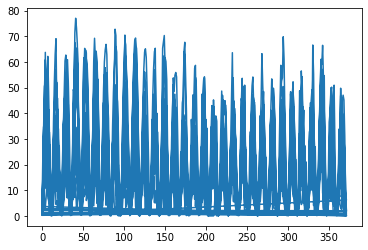

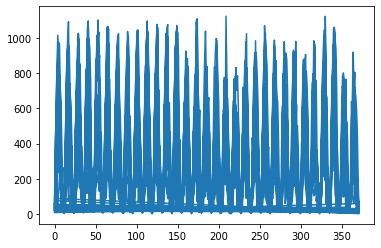

In [9]:
dataFrame['Energia [kWh]'].plot()
plt.show()
dataFrame['Irradiacion [Wh/m2]'].plot()

In [10]:
horas = dataFrame['Hora'].unique()
horas

array(['6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00',
       '14:00', '15:00', '16:00', '17:00'], dtype=object)

In [11]:
irr_prom = []
ene_prom = []

irr_std = []
ene_std = []

for h in horas:
    df = dataFrame[dataFrame['Hora']==h]
    
    energy = df['Energia [kWh]'].mean()
    irradiance  =df['Irradiacion [Wh/m2]'].mean()
    
    energy_std = df['Energia [kWh]'].std()
    irradiance_std  =df['Irradiacion [Wh/m2]'].std()
    
    ene_prom.append(energy)
    irr_prom.append(irradiance)
    
    ene_std.append(energy_std)
    irr_std.append(irradiance_std)


In [12]:
porHora = pd.DataFrame({'Hora':horas,'Energia Prom [kWh]':ene_prom,'Irradiacion Prom [Wh/m2]':irr_prom,
                        'Energia desv [kWh]': ene_std,'Irradiacion desv [Wh/m2]':irr_std})
porHora.to_csv('Estadisticas por hora.csv')

In [13]:
porHora

,Hora,Energia Prom [kWh],Irradiacion Prom [Wh/m2],Energia desv [kWh],Irradiacion desv [Wh/m2]
0,6:00,1.669605,36.732636,1.132852,22.037113
1,7:00,9.283936,189.370182,4.759372,109.302048
2,8:00,19.101243,354.244176,9.229886,176.658672
3,9:00,25.971177,463.021567,11.903278,215.963951
4,10:00,30.415977,530.439156,14.084939,247.390029
5,11:00,31.178832,535.630262,15.108984,263.046497
6,12:00,28.835844,480.730073,15.478485,259.766559
7,13:00,24.735045,350.265122,14.606989,195.562491
8,14:00,19.001918,238.343834,11.545151,150.413175
9,15:00,12.224898,149.608231,8.140235,97.757426


Hora: 
Entre 6:00 y 17:00
7:00


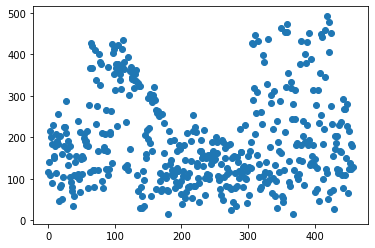

In [14]:
hora = input('Hora: \nEntre 6:00 y 17:00\n')
plt.scatter(range(len(dataFrame[dataFrame['Hora']==hora])),dataFrame[dataFrame['Hora']==hora]['Irradiacion [Wh/m2]'])

In [15]:
promedios = pd.read_csv('Estadisticas por hora.csv')
promedios.drop('Unnamed: 0',axis = 1,inplace = True)
promedios

,Hora,Energia Prom [kWh],Irradiacion Prom [Wh/m2],Energia desv [kWh],Irradiacion desv [Wh/m2]
0,6:00,1.669605,36.732636,1.132852,22.037113
1,7:00,9.283936,189.370182,4.759372,109.302048
2,8:00,19.101243,354.244176,9.229886,176.658672
3,9:00,25.971177,463.021567,11.903278,215.963951
4,10:00,30.415977,530.439156,14.084939,247.390029
5,11:00,31.178832,535.630262,15.108984,263.046497
6,12:00,28.835844,480.730073,15.478485,259.766559
7,13:00,24.735045,350.265122,14.606989,195.562491
8,14:00,19.001918,238.343834,11.545151,150.413175
9,15:00,12.224898,149.608231,8.140235,97.757426


In [16]:
rango1 = []
rango2 = []
horas = promedios['Hora']
for i in range(len(promedios)):
    lim1 = promedios['Irradiacion Prom [Wh/m2]'][i] - promedios['Irradiacion desv [Wh/m2]'][i]/2
    lim2 = promedios['Irradiacion Prom [Wh/m2]'][i] + promedios['Irradiacion desv [Wh/m2]'][i]/2
    
    rango1.append(lim1)
    rango2.append(lim2)
rangos = pd.DataFrame({'Hora':horas,'Limite Inf':rango1,'Limite Sup':rango2})
rangos.set_index('Hora',inplace = True)
rangos

,Limite Inf,Limite Sup
Hora,,
6:00,25.714080,47.751193
7:00,134.719158,244.021206
8:00,265.914840,442.573512
9:00,355.039591,571.003542
10:00,406.744141,654.134170
11:00,404.107013,667.153511
12:00,350.846793,610.613352
13:00,252.483876,448.046368
14:00,163.137246,313.550421


In [17]:
todoporHora = pd.read_csv('Todo por hora.csv')
todoporHora.drop('Unnamed: 0',axis = 1,inplace = True)
todoporHora

,Fecha,Hora,Energia [kWh],Irradiacion [Wh/m2]
0,1/04/2020,6:00,1.005833,22.875000
1,1/04/2020,7:00,6.593333,115.340833
2,1/04/2020,8:00,15.385833,269.870000
3,1/04/2020,9:00,6.713333,118.296667
4,1/04/2020,10:00,3.472500,59.250000
...,...,...,...,...
5491,30/09/2020,13:00,39.585000,741.970833
5492,30/09/2020,14:00,24.003333,398.950000
5493,30/09/2020,15:00,10.800833,170.588333
5494,30/09/2020,16:00,4.070000,72.150833


# Clasificación

In [18]:
m = len(todoporHora)

soleados = [0]*m
lluviosos = [0]*m
nubados = [0]*m

horas = todoporHora['Hora'].unique()
fechas = todoporHora.Fecha

for h in horas:
    inf = rangos['Limite Inf'][h]
    sup = rangos['Limite Sup'][h]
    for i in range(len(todoporHora)):
        irr_actual =todoporHora['Irradiacion [Wh/m2]'][i]
        
        if todoporHora['Hora'][i] == h:
            if  irr_actual < inf:
                lluviosos[i] = 1
                
            elif inf < irr_actual < sup:
                nubados[i] = 1
            
            else:
                soleados[i] = 1

clima = pd.DataFrame({'Fecha':fechas,'Hora':todoporHora['Hora'],'Lluvioso':lluviosos, 'Nublado':nubados,'Soleado':soleados})

In [19]:
sum(lluviosos)*12

24696

In [20]:
clima

,Fecha,Hora,Lluvioso,Nublado,Soleado
0,1/04/2020,6:00,1,0,0
1,1/04/2020,7:00,1,0,0
2,1/04/2020,8:00,0,1,0
3,1/04/2020,9:00,1,0,0
4,1/04/2020,10:00,1,0,0
...,...,...,...,...,...
5491,30/09/2020,13:00,0,0,1
5492,30/09/2020,14:00,0,0,1
5493,30/09/2020,15:00,0,1,0
5494,30/09/2020,16:00,0,1,0


(-1.118892723532241, 1.1008996535015352, -1.11140673916611, 1.1135056364927596)

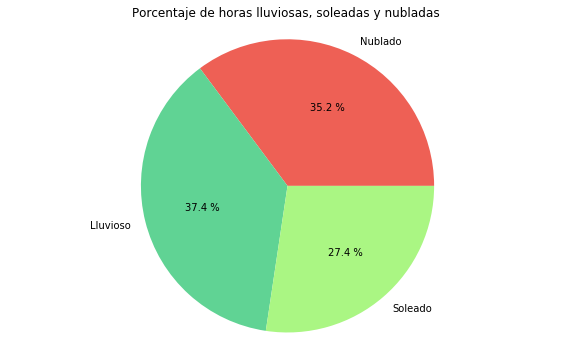

In [21]:
counts = [sum(nubados)/5496, sum(lluviosos)/5496,sum(soleados)/5496]
estado = ['Nublado','Lluvioso','Soleado']

colores = ["#EE6055","#60D394","#AAF683"]

plt.figure(figsize=(10,6))
plt.pie(counts,labels = estado,autopct="%0.1f %%",colors = colores)
plt.title('Porcentaje de horas lluviosas, soleadas y nubladas')
plt.axis('equal')

# Muestra de 5496 datos

In [22]:
horas = clima.Hora.unique()
n = len(horas)
lluvia = [0]*n
sol = [0]*n
nube = [0]*n
for i in range(len(horas)):
    lluvia[i] = clima[clima['Hora']==horas[i]]['Lluvioso'].sum()
    sol[i] = clima[clima['Hora']==horas[i]]['Soleado'].sum()
    nube[i] = clima[clima['Hora']==horas[i]]['Nublado'].sum()
climaHora = pd.DataFrame({'Hora':horas,'Lluvioso':lluvia,'Soleado':sol,'Nublado':nube})
climaHora.set_index('Hora',inplace = True)

Text(0, 0.5, 'Frecuencia')

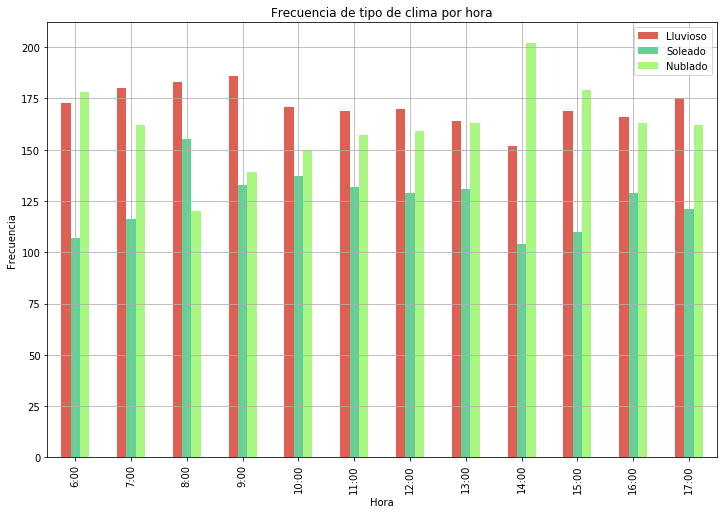

In [23]:
colores = ["#DE6055","#60D394","#AAF683"]
climaHora.plot.bar(figsize = (12,8),grid = True,color = colores)
plt.title('Frecuencia de tipo de clima por hora')
plt.ylabel('Frecuencia')

# DataFrames Finales

In [24]:
#Función para generar un dataframe con los datos de Energia en kWh 
#y de irradiación en Wh/m2 por cada uno de los datos 

def nuevoFrame(mesActual):
    i = 0
    j = 0
    energia = []
    irradiacion = []
    fechas = []
    horas = []
    try:
        while i<len(mesActual):
            fechas.append(mesActual['Fecha'][i])
            horas.append(mesActual['Hora'][i])
            energia.append(mesActual['Potencia [kW]'][i:i+12].sum()/12)
            irradiacion.append(mesActual['Insolacion [W/m2]'][i:i+12].sum()/12)
            i+=12
        datos = pd.DataFrame({'Fecha':fechas,'Hora':horas,'Energia [kWh]':energia,'Irradiacion [Wh/m2]':irradiacion})
        return datos
    except:
        pass

In [25]:
#Función para generar un dataframe con los datos de Energia en kWh 
#y de irradiación en Wh/m2 por cada hora del día

def nuevoFrame2(mesActual):
    try:
        fechas = mesActual['Fecha']
        horas = mesActual['Hora']
        energia = mesActual['Potencia [kW]']
        irradiacion = mesActual['Insolacion [W/m2]']
        temperatura = mesActual['Temperatura de modulos [C]']
        datos = pd.DataFrame({'Fecha':fechas,'Hora':horas,'Potencia [kW]':energia,'Irradiacion [W/m2]':irradiacion,
                              'Temperatura de modulos[C]':temperatura})
        return datos
    except:
        pass

In [26]:
archivos = glob.glob('*.csv')
archivos

['Abril 2020.csv',
 'Agosto 2020.csv',
 'DataFinalBeta.csv',
 'Diciembre 2019.csv',
 'Diciembre 2020.csv',
 'Energia e irradiacion por hora.csv',
 'Enero 2020.csv',
 'Estadisticas por hora.csv',
 'Febrero 2020.csv',
 'Julio 2020.csv',
 'Junio 2020.csv',
 'Marzo 2020.csv',
 'Mayo 2020.csv',
 'Noviembre 2019.csv',
 'Noviembre 2020.csv',
 'Octubre 2019.csv',
 'Octubre 2020.csv',
 'Septiembre 2020.csv',
 'Todo por hora.csv']

In [27]:
start = 0
for arch in archivos:
    df = pd.read_csv(arch)
    df = nuevoFrame2(df)
    if start == 0:
        dataFinal= df
    else:
        dataFinal= pd.concat([dataFinal,df])
    start+=1
dataFinal.to_csv('DataFinalBeta.csv')

In [28]:
dataFinal = pd.read_csv('DataFinalBeta.csv')
dataFinal.drop('Unnamed: 0',axis = 1 ,inplace = True)
dataFinal.head(15)

,Fecha,Hora,Potencia [kW],Irradiacion [W/m2],Temperatura de modulos[C]
0,1/04/2020,6:00,0.00,2.02,12.17
1,1/04/2020,6:05,0.00,3.20,12.33
2,1/04/2020,6:10,0.01,4.51,12.39
3,1/04/2020,6:15,0.11,6.98,12.04
4,1/04/2020,6:20,0.24,10.52,11.79
5,1/04/2020,6:25,0.46,14.78,11.90
6,1/04/2020,6:30,0.79,20.85,11.74
7,1/04/2020,6:35,1.25,29.65,11.61
8,1/04/2020,6:40,1.90,40.85,11.92
9,1/04/2020,6:45,2.35,46.22,12.72


In [29]:
clima

,Fecha,Hora,Lluvioso,Nublado,Soleado
0,1/04/2020,6:00,1,0,0
1,1/04/2020,7:00,1,0,0
2,1/04/2020,8:00,0,1,0
3,1/04/2020,9:00,1,0,0
4,1/04/2020,10:00,1,0,0
...,...,...,...,...,...
5491,30/09/2020,13:00,0,0,1
5492,30/09/2020,14:00,0,0,1
5493,30/09/2020,15:00,0,1,0
5494,30/09/2020,16:00,0,1,0


In [30]:
n = len(clima)
soleado = []
nublado  = []
lluvioso = []

for i in range(n):
    soleado+=[clima['Soleado'][i]]*12
    lluvioso+=[clima['Lluvioso'][i]]*12
    nublado+=[clima['Nublado'][i]]*12

dataFinal['Lluvioso'] = lluvioso
dataFinal['Nublado'] = nublado
dataFinal['Soleado'] = soleado

In [31]:
dataFinal.Lluvioso.sum()

24696

In [32]:
dataFinal[80:140]

,Fecha,Hora,Potencia [kW],Irradiacion [W/m2],Temperatura de modulos[C],Lluvioso,Nublado,Soleado
80,1/04/2020,12:40,15.66,239.34,22.51,1,0,0
81,1/04/2020,12:45,15.07,237.19,22.77,1,0,0
82,1/04/2020,12:50,16.73,265.76,23.13,1,0,0
83,1/04/2020,12:55,14.53,230.73,23.73,1,0,0
84,1/04/2020,13:00,15.42,246.47,23.35,1,0,0
85,1/04/2020,13:05,16.91,270.41,23.97,1,0,0
86,1/04/2020,13:10,16.84,272.56,24.71,1,0,0
87,1/04/2020,13:15,13.30,219.59,25.13,1,0,0
88,1/04/2020,13:20,6.78,116.71,23.42,1,0,0
89,1/04/2020,13:25,5.51,92.95,21.83,1,0,0


In [33]:
clima.head(12)

,Fecha,Hora,Lluvioso,Nublado,Soleado
0,1/04/2020,6:00,1,0,0
1,1/04/2020,7:00,1,0,0
2,1/04/2020,8:00,0,1,0
3,1/04/2020,9:00,1,0,0
4,1/04/2020,10:00,1,0,0
5,1/04/2020,11:00,1,0,0
6,1/04/2020,12:00,1,0,0
7,1/04/2020,13:00,1,0,0
8,1/04/2020,14:00,1,0,0
9,1/04/2020,15:00,0,1,0


##  Modelo SARIMAX por Hora 

### SARIMAX - Seasonal AutoRegressive (p) Integrated(d) Moving Average (q) Exogenous

In [34]:
todoporHora['Lluvioso'] = clima.Lluvioso
todoporHora['Nublado'] = clima.Nublado
todoporHora['Soleado'] = clima.Soleado
todoporHora1 = todoporHora
todoporHora

,Fecha,Hora,Energia [kWh],Irradiacion [Wh/m2],Lluvioso,Nublado,Soleado
0,1/04/2020,6:00,1.005833,22.875000,1,0,0
1,1/04/2020,7:00,6.593333,115.340833,1,0,0
2,1/04/2020,8:00,15.385833,269.870000,0,1,0
3,1/04/2020,9:00,6.713333,118.296667,1,0,0
4,1/04/2020,10:00,3.472500,59.250000,1,0,0
...,...,...,...,...,...,...,...
5491,30/09/2020,13:00,39.585000,741.970833,0,0,1
5492,30/09/2020,14:00,24.003333,398.950000,0,0,1
5493,30/09/2020,15:00,10.800833,170.588333,0,1,0
5494,30/09/2020,16:00,4.070000,72.150833,0,1,0


In [35]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import acf,pacf

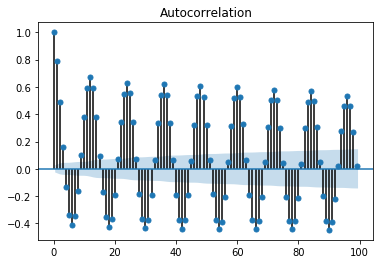

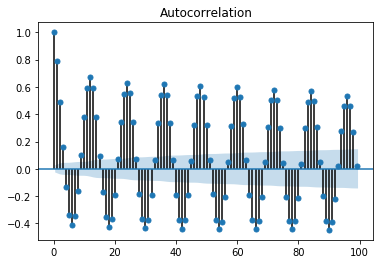

In [36]:
# plot_acf para identificar el parámetro q
# plot_pacf para identificar el parámetro p
# SARIMAX (p,d,q)(P,D,Q,T)
plot_acf(todoporHora['Energia [kWh]'],lags = np.arange(100))

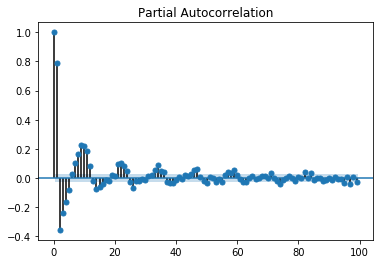

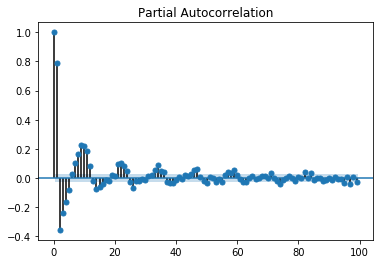

In [37]:
plot_pacf(todoporHora['Energia [kWh]'],lags = np.arange(100))

In [38]:
promedio = dataFinal['Potencia [kW]'].mean()
proms = [promedio]*len(dataFinal)
dataFinal['Ajuste'] = np.log10(dataFinal['Potencia [kW]'])-proms

C:\Users\USUARIO\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [39]:
dataFinal

,Fecha,Hora,Potencia [kW],Irradiacion [W/m2],Temperatura de modulos[C],Lluvioso,Nublado,Soleado,Ajuste
0,1/04/2020,6:00,0.00,2.02,12.17,1,0,0,-inf
1,1/04/2020,6:05,0.00,3.20,12.33,1,0,0,-inf
2,1/04/2020,6:10,0.01,4.51,12.39,1,0,0,-19.501278
3,1/04/2020,6:15,0.11,6.98,12.04,1,0,0,-18.459885
4,1/04/2020,6:20,0.24,10.52,11.79,1,0,0,-18.121067
...,...,...,...,...,...,...,...,...,...
65947,30/09/2020,17:35,0.42,13.87,15.79,0,1,0,-17.878029
65948,30/09/2020,17:40,0.17,8.58,15.75,0,1,0,-18.270829
65949,30/09/2020,17:45,0.00,3.21,15.58,0,1,0,-inf
65950,30/09/2020,17:50,0.00,1.75,15.54,0,1,0,-inf


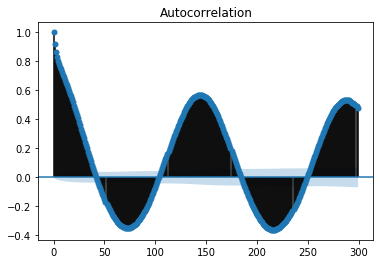

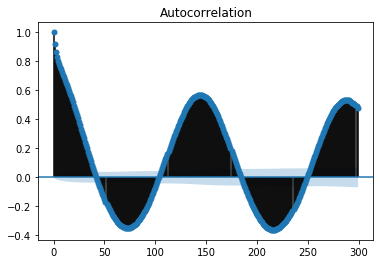

In [40]:
plot_acf(dataFinal['Potencia [kW]'],lags = np.arange(300))

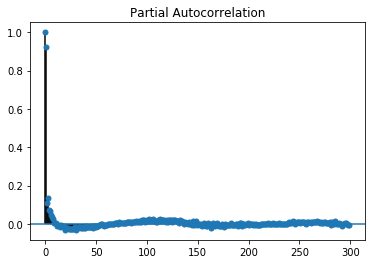

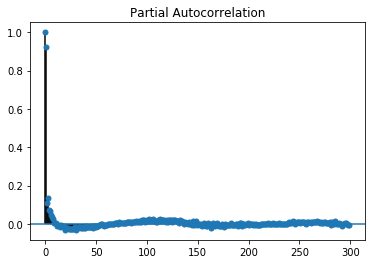

In [41]:
plot_pacf(dataFinal['Potencia [kW]'], lags = np.arange(300))

## Conversión a estacionario

In [42]:
dataFinal_m = dataFinal[0:4320]
dataFinal_m

,Fecha,Hora,Potencia [kW],Irradiacion [W/m2],Temperatura de modulos[C],Lluvioso,Nublado,Soleado,Ajuste
0,1/04/2020,6:00,0.00,2.02,12.17,1,0,0,-inf
1,1/04/2020,6:05,0.00,3.20,12.33,1,0,0,-inf
2,1/04/2020,6:10,0.01,4.51,12.39,1,0,0,-19.501278
3,1/04/2020,6:15,0.11,6.98,12.04,1,0,0,-18.459885
4,1/04/2020,6:20,0.24,10.52,11.79,1,0,0,-18.121067
...,...,...,...,...,...,...,...,...,...
4315,30/04/2020,17:35,0.48,13.52,17.89,1,0,0,-17.820037
4316,30/04/2020,17:40,0.32,10.56,17.81,1,0,0,-17.996128
4317,30/04/2020,17:45,0.17,8.05,17.82,1,0,0,-18.270829
4318,30/04/2020,17:50,0.06,5.26,17.73,1,0,0,-18.723127


In [45]:
ajuste = []
for i in range(len(dataFinal_m)):
    p_actual = dataFinal_m['Potencia [kW]'][i]
    if p_actual ==0.0:
        ajuste.append(np.log10(0.01))
    else:
        ajuste.append(np.log10(p_actual))
dataFinal_m['Ajuste'] = ajuste
dataFinal_m

C:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Fecha,Hora,Potencia [kW],Irradiacion [W/m2],Temperatura de modulos[C],Lluvioso,Nublado,Soleado,Ajuste
0,1/04/2020,6:00,0.00,2.02,12.17,1,0,0,-2.000000
1,1/04/2020,6:05,0.00,3.20,12.33,1,0,0,-2.000000
2,1/04/2020,6:10,0.01,4.51,12.39,1,0,0,-2.000000
3,1/04/2020,6:15,0.11,6.98,12.04,1,0,0,-0.958607
4,1/04/2020,6:20,0.24,10.52,11.79,1,0,0,-0.619789
...,...,...,...,...,...,...,...,...,...
4315,30/04/2020,17:35,0.48,13.52,17.89,1,0,0,-0.318759
4316,30/04/2020,17:40,0.32,10.56,17.81,1,0,0,-0.494850
4317,30/04/2020,17:45,0.17,8.05,17.82,1,0,0,-0.769551
4318,30/04/2020,17:50,0.06,5.26,17.73,1,0,0,-1.221849


<Figure size 432x288 with 0 Axes>

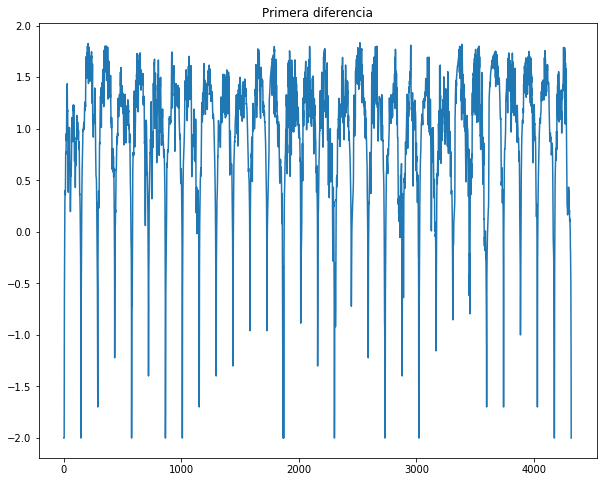

<Figure size 432x288 with 0 Axes>

In [48]:
plt.figure(figsize = (10,8))
plt.plot(dataFinal_m['Ajuste'])
plt.title('Primera diferencia')
plt.figure()

In [55]:
prim_diff = dataFinal_m['Ajuste'].diff()
diff_144 = prim_diff.diff(144)

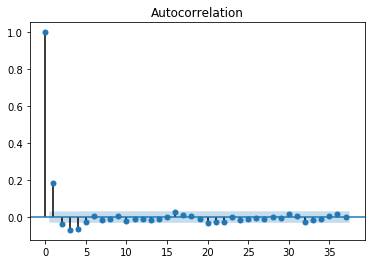

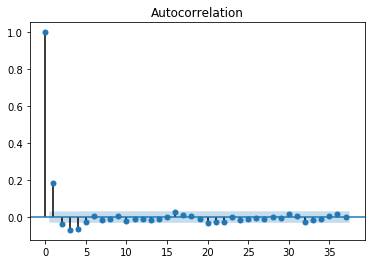

In [65]:
plot_acf(prim_diff[1:])

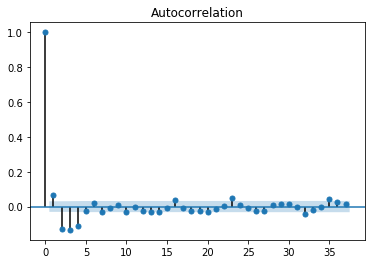

<Figure size 432x288 with 0 Axes>

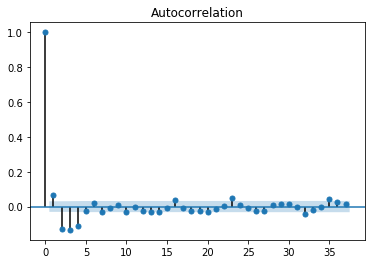

In [62]:
plt.figure()
plot_acf(np.array(diff_144[145:]))

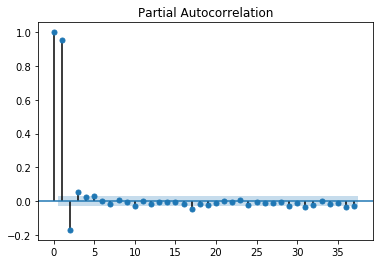

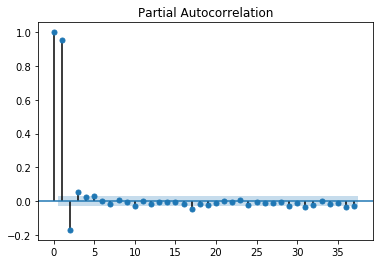

In [54]:
plot_pacf(dataFinal_m['Ajuste'][1:])

In [73]:
dia_pron = pd.read_csv('Dia pronostico.csv')[72:216]
dia_pron

,Fecha,Potencia [kW],Insolacion [W/m2]
72,6:00,0.00,1.24
73,6:05,0.00,2.69
74,6:10,0.00,4.68
75,6:15,0.04,6.89
76,6:20,0.13,10.04
...,...,...,...
211,17:35,0.74,18.84
212,17:40,0.62,16.85
213,17:45,0.42,14.27
214,17:50,0.20,10.84


In [ ]:
np.mean_squared_error()